In [1]:
from src.processing.rr_features import extract_peaks_find_peaks, extract_peaks_neurokit, extract_peaks_pan_tompkins, \
    filter_peaks, plot_signals_with_r_peaks
import pandas as pd
import os

In [2]:
df = pd.read_pickle(os.path.join("C:/Users/sebas/PycharmProjects/TFC/data/processed", "df_data.pkl"))
# print(df.head())
print(df.columns.tolist())
print(f"Total records loaded: {len(df)}")

['record_id', 'signal', 'age', 'sex', 'diagnosticos']
Total records loaded: 45150


In [2]:
# Extract R-peaks using pan tompkins algorithm
df_ecg_nk = extract_peaks_neurokit(df)

# Mean
print(f"Mean number of R-peaks (pan_tompkins): {df_ecg_nk['r_peaks'].apply(len).mean()}")



['record_id', 'signal', 'age', 'sex', 'diagnosticos']
Total records loaded: 45150
**** Mean number of R-peaks: 12.063477297895902 using neurokit ****
Mean number of R-peaks (pan_tompkins): 12.063477297895902


In [3]:
print("Filtering peaks pan_tompkins")
df_filtrado = df_ecg_nk[df_ecg_nk["r_peaks"].apply(lambda x: len(x) > 20 or len(x) < 7)].copy()

Filtering peaks pan_tompkins


In [4]:
print(f"Total records after filtering: {len(df_filtrado)}")

Total records after filtering: 5469


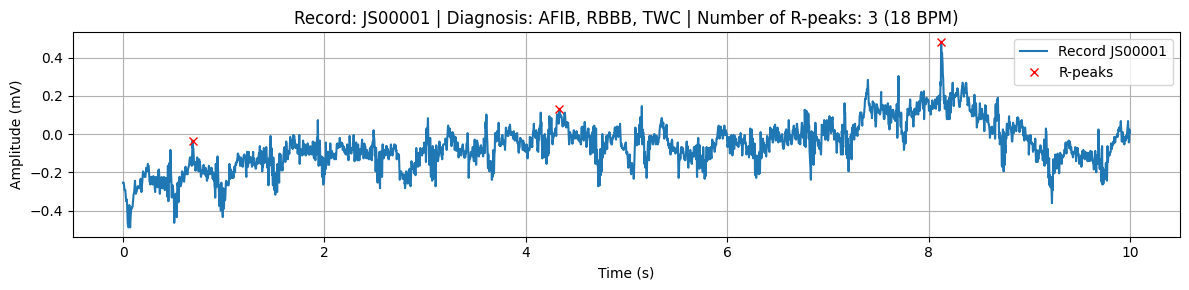

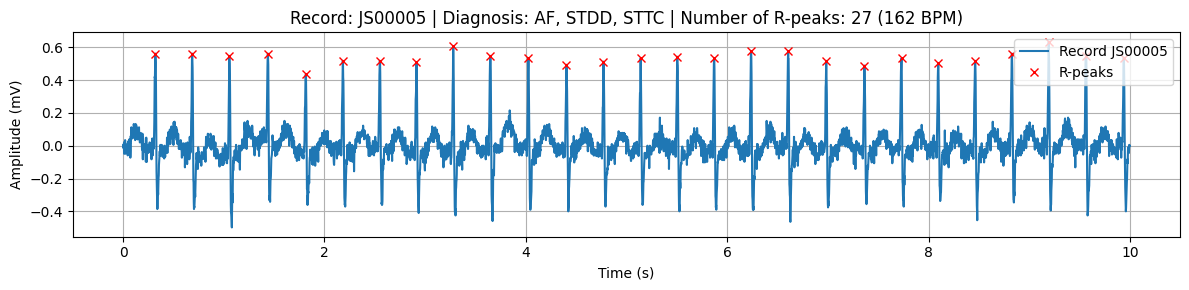

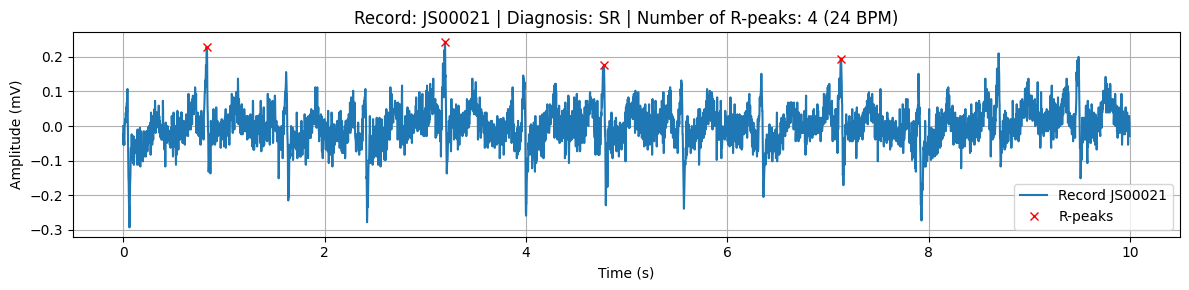

In [15]:
# plot 10 filtered records
plot_signals_with_r_peaks(df_filtrado, num_signals=3)

In [6]:
df_ecg_fp = extract_peaks_find_peaks(df)

# Mean

print(f"Mean number of R-peaks (find_peaks): {df_ecg_fp['r_peaks'].apply(len).mean()}")

**** Mean number of peaks found: 12.117209302325582 using find_peaks ****
Mean number of R-peaks (find_peaks): 12.117209302325582


In [7]:
print("Filtering peaks pan_tompkins")
df_filtrado = df_ecg_fp[df_ecg_fp["r_peaks"].apply(lambda x: len(x) > 20 or len(x) < 7)].copy()
print(f"Total records after filtering: {len(df_filtrado)}")


Filtering peaks pan_tompkins
Total records after filtering: 7408


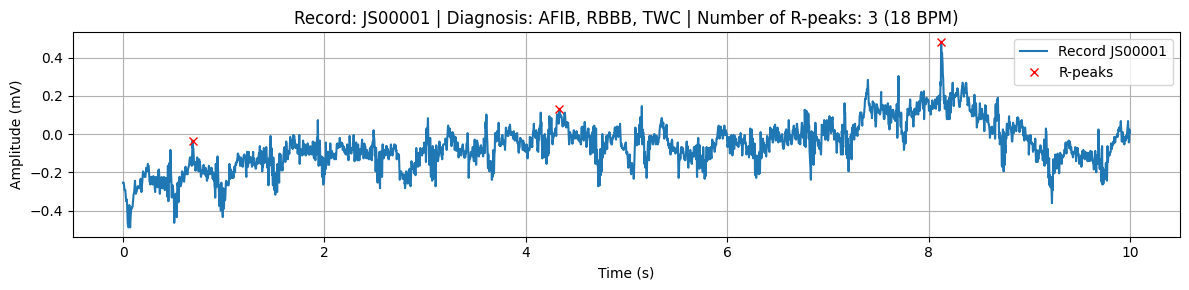

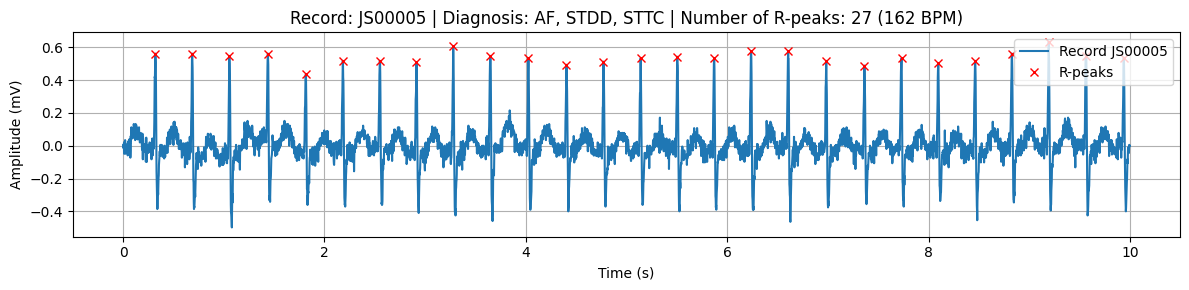

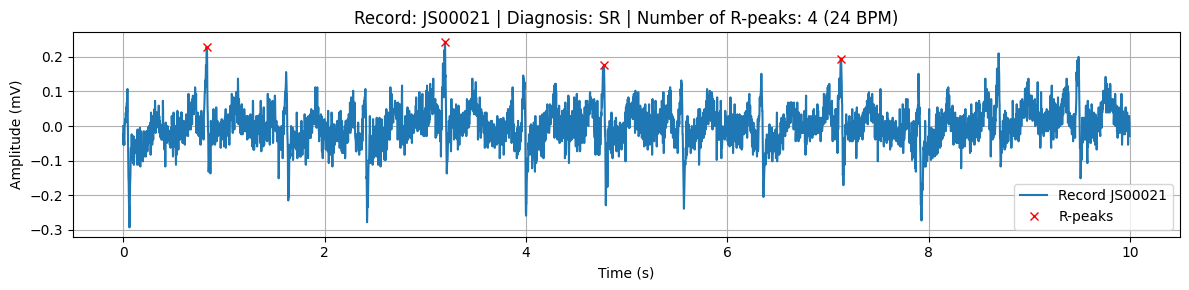

In [16]:
# plot 10 filtered records
plot_signals_with_r_peaks(df_filtrado, num_signals=3)

In [12]:
# num cases with AFIB
has_afib = df_filtrado["diagnosticos"].apply(lambda x: "AFIB" in x)
num_afib = has_afib.sum()
print(f"Number of cases with AFIB: {num_afib} ({num_afib / len(df_filtrado) * 100:.2f}%)")

Number of cases with AFIB: 422 (5.70%)


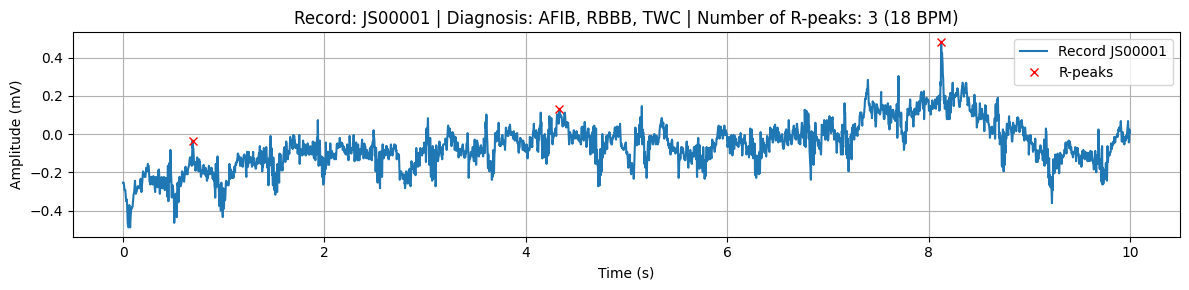

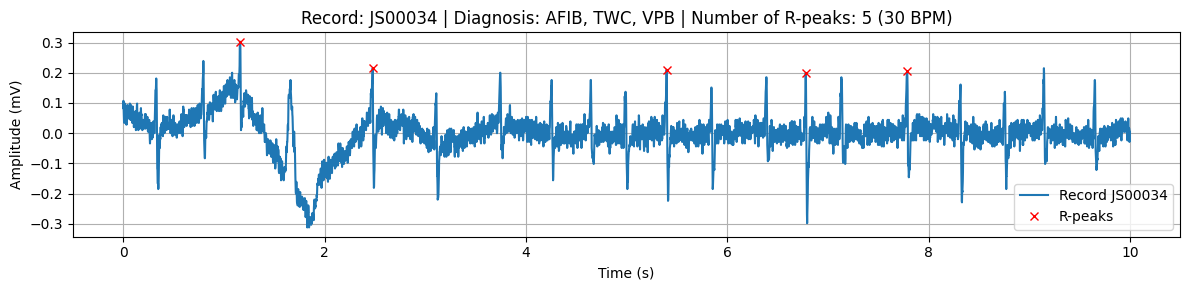

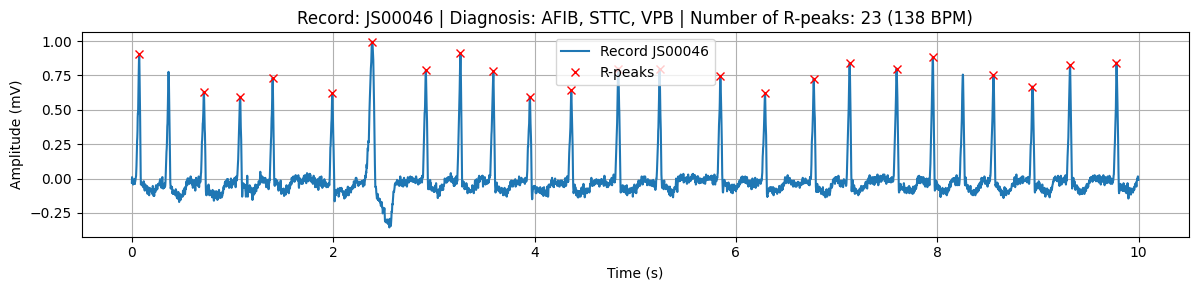

In [17]:
# plot cases with AFIB
cases_afib = df_filtrado[has_afib].copy()
plot_signals_with_r_peaks(cases_afib, num_signals=3)
